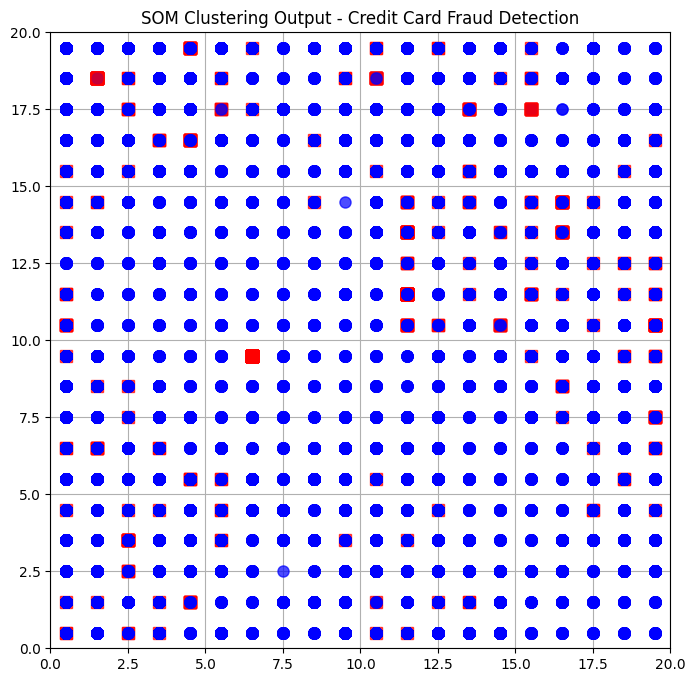

In [5]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from minisom import MiniSom
import matplotlib.pyplot as plt
df_credit = pd.read_csv('C:/Users/Lokesh/Desktop/BDA/credit/creditcard.csv')

X_credit = df_credit.drop(columns=['Class']) 
y_credit = df_credit['Class'] 

scaler = MinMaxScaler()
features_normalized_credit = scaler.fit_transform(X_credit)

som_credit = MiniSom(x=20, y=20, input_len=features_normalized_credit.shape[1], sigma=1.0, learning_rate=0.5)
som_credit.random_weights_init(features_normalized_credit)
som_credit.train_random(features_normalized_credit, 2000)

plt.figure(figsize=(8, 8))
mapped_data_credit = np.array([som_credit.winner(x) for x in features_normalized_credit])

for c, (i, j) in enumerate(mapped_data_credit):
    marker = 'o' if y_credit.iloc[c] == 0 else 's' 
    color = 'blue' if y_credit.iloc[c] == 0 else 'red'
    
    plt.plot(i + 0.5, j + 0.5, marker, markerfacecolor=color, 
             markeredgecolor=color, markersize=8, alpha=0.7)

plt.title('SOM Clustering Output - Credit Card Fraud Detection')
plt.grid(True)

som_x, som_y, _ = som_credit.get_weights().shape

plt.xlim([0, som_x])
plt.ylim([0, som_y])
plt.show()


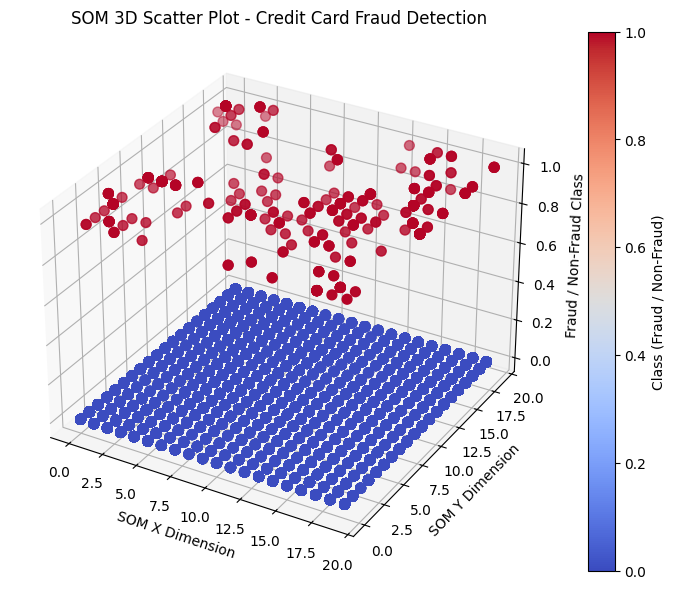

In [3]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from minisom import MiniSom
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

df_credit = pd.read_csv('C:/Users/Lokesh/Desktop/BDA/credit/creditcard.csv')

X_credit = df_credit.drop(columns=['Class'])  
y_credit = df_credit['Class'] 

scaler = MinMaxScaler()
features_normalized_credit = scaler.fit_transform(X_credit)

som_credit = MiniSom(x=20, y=20, input_len=features_normalized_credit.shape[1], sigma=1.0, learning_rate=0.5)
som_credit.random_weights_init(features_normalized_credit)
som_credit.train_random(features_normalized_credit, 2000)

mapped_data_credit = np.array([som_credit.winner(x) for x in features_normalized_credit])

som_x = mapped_data_credit[:, 0]
som_y = mapped_data_credit[:, 1]

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(som_x, som_y, y_credit, c=y_credit, cmap='coolwarm', s=50)

ax.set_xlabel('SOM X Dimension')
ax.set_ylabel('SOM Y Dimension')
ax.set_zlabel('Fraud / Non-Fraud Class')

legend = plt.colorbar(scatter)
legend.set_label('Class (Fraud / Non-Fraud)')

plt.title('SOM 3D Scatter Plot - Credit Card Fraud Detection')
plt.show()


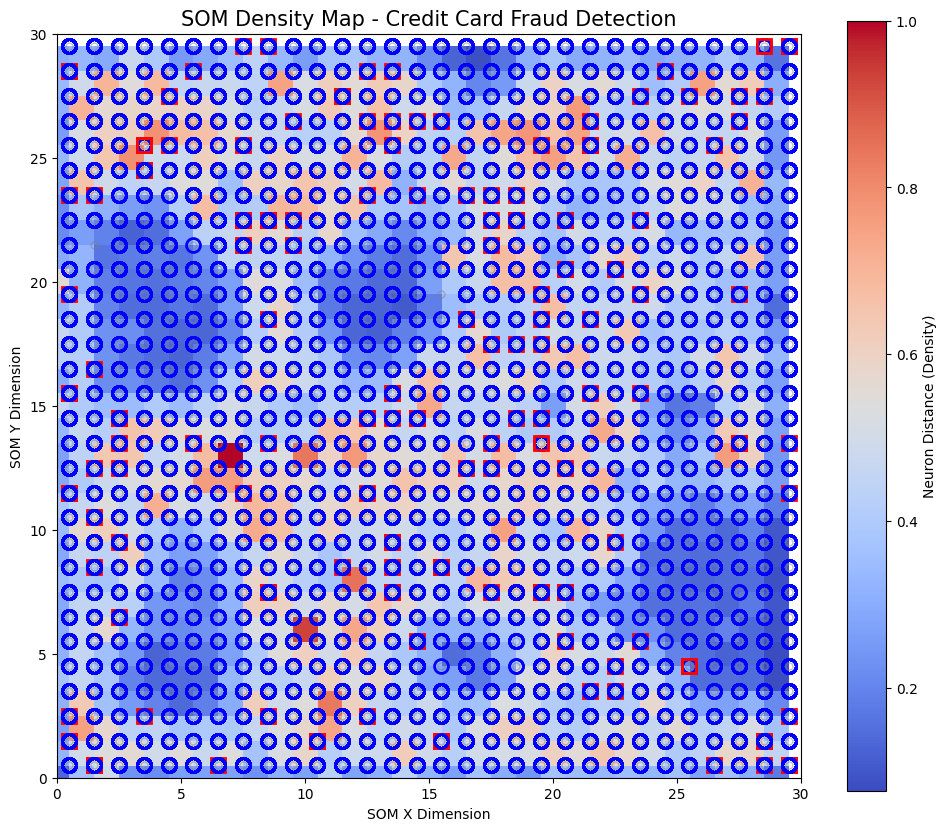

In [7]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from minisom import MiniSom
import matplotlib.pyplot as plt

df_credit = pd.read_csv('C:/Users/Lokesh/Desktop/BDA/credit/creditcard.csv') 

X_credit = df_credit.drop(columns=['Class']) 
y_credit = df_credit['Class']             

scaler = MinMaxScaler()
features_normalized_credit = scaler.fit_transform(X_credit)

som_credit = MiniSom(x=30, y=30, input_len=features_normalized_credit.shape[1], sigma=1.0, learning_rate=0.5)
som_credit.random_weights_init(features_normalized_credit)
som_credit.train_random(features_normalized_credit, 2000) 

plt.figure(figsize=(12, 10))
plt.title('SOM Density Map - Credit Card Fraud Detection', fontsize=15)

u_matrix = som_credit.distance_map().T 
plt.imshow(u_matrix, cmap='coolwarm') 
plt.colorbar(label='Neuron Distance (Density)')

markers = ['o', 's'] 
colors = ['blue', 'red']  

for i, x in enumerate(features_normalized_credit):
    w = som_credit.winner(x) 
    plt.plot(w[0] + 0.5, w[1] + 0.5, markers[y_credit.iloc[i]],
             markerfacecolor='None', markeredgecolor=colors[y_credit.iloc[i]],
             markersize=10, markeredgewidth=2)

for i in range(30):
    for j in range(30):
        plt.plot(i + 0.5, j + 0.5, 'o', markerfacecolor='None', 
                 markeredgecolor='gray', markersize=5, alpha=0.5)

plt.xlim([0, som_credit.get_weights().shape[0]])
plt.ylim([0, som_credit.get_weights().shape[1]])

plt.grid(False)
plt.xlabel('SOM X Dimension')
plt.ylabel('SOM Y Dimension')
plt.show()
